In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from matplotlib.patches import Polygon
mpl.rcParams['text.usetex'] = True

In [63]:
algorithm = 'KNN'
path = '/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/Classification/Probabilities/'+algorithm
bayes = pd.read_csv(path+'/BayesFactors.csv',delimiter=',')

eos = bayes[['EOS']].values[:,0]
bfactors = bayes[['BayesFactor']].values[:,0]

In [53]:
fit = pd.read_csv(path+'/'+algorithm+'_P_NS_given_X1pX2-BF-fit.csv',delimiter=',')
num = pd.read_csv(path+'/'+algorithm+'_P_NS_given_X1pX2-BF-num.csv',delimiter=',')

xfit_ns = fit[['X1+X2']].values[:,0]
xnum_ns = num[['X1+X2']].values[:,0]

prob_fit_ns = []
prob_num_ns = []

for ee in eos:
    probf = fit[['P_NS('+ee+')']].values
    prob_fit_ns.append(probf[:,0])
    probn = num[['P_NS('+ee+')']].values
    prob_num_ns.append(probn[:,0])

In [54]:
fit = pd.read_csv(path+'/'+algorithm+'_P_REM_given_X2-BF-fit.csv',delimiter=',')
num = pd.read_csv(path+'/'+algorithm+'_P_REM_given_X2-BF-num.csv',delimiter=',')

xfit_rem = fit[['X2']].values[:,0]
xnum_rem = num[['X2']].values[:,0]

prob_fit_rem = []
prob_num_rem = []

for ee in eos:
    probf = fit[['P_REM('+ee+')']].values
    prob_fit_rem.append(probf[:,0])
    probn = num[['P_REM('+ee+')']].values
    prob_num_rem.append(probn[:,0])

In [55]:
prob_fit_ns = np.array(prob_fit_ns)
prob_num_ns = np.array(prob_num_ns)
prob_fit_rem = np.array(prob_fit_rem)
prob_num_rem = np.array(prob_num_rem)

pfitns = np.sum(prob_fit_ns,axis = 0)
pnumns = np.sum(prob_num_ns,axis = 0)

pfitrem = np.sum(prob_fit_rem,axis = 0)
pnumrem = np.sum(prob_num_rem,axis = 0)

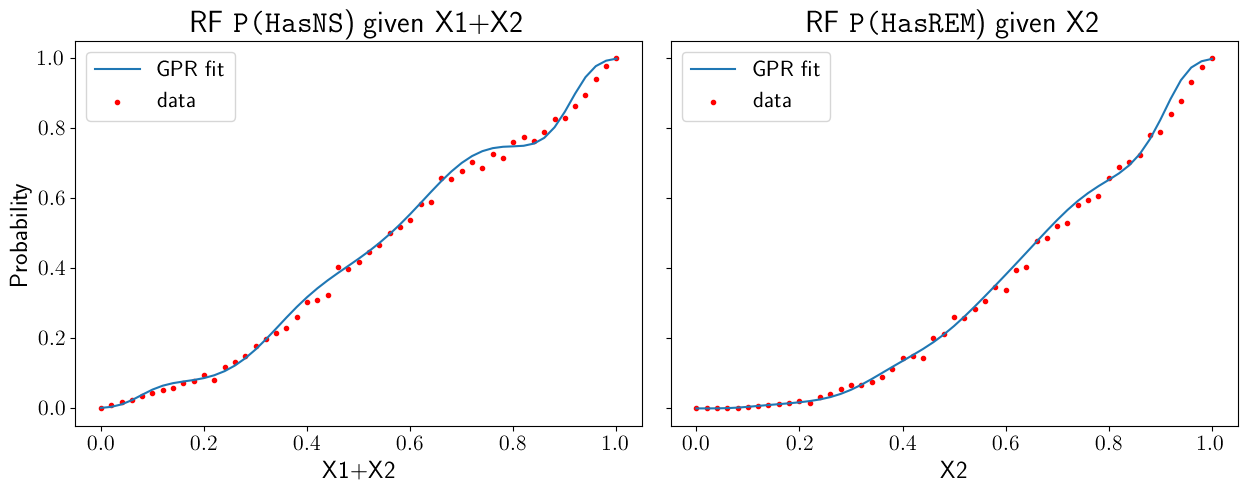

In [59]:
fig, ax = plt.subplots(1,2, sharey = 'all', figsize = (15,5))
fig.subplots_adjust(wspace=0.05)

for i in range(0,2):
    ax[i].tick_params(axis='x', labelsize=16)
    ax[i].tick_params(axis='y', labelsize=16)
       
ax[0].plot(xfit_ns,pfitns, label = 'GPR fit')
ax[0].scatter(xnum_ns,pnumns, marker = '.', color = 'red', label = 'data')
ax[1].plot(xfit_rem,pfitrem, label = 'GPR fit')
ax[1].scatter(xnum_rem,pnumrem, marker = '.', color = 'red', label = 'data')
ax[0].set_title(algorithm+r' \texttt{P(HasNS}) given X1+X2', fontsize = 22)
ax[1].set_title(algorithm+r' \texttt{P(HasREM}) given X2', fontsize = 22)
ax[0].set_ylabel('Probability', fontsize = 18)
ax[0].set_xlabel('X1+X2', fontsize = 18)
ax[1].set_xlabel('X2', fontsize = 18)
ax[0].legend(fontsize = 16)
ax[1].legend(fontsize = 16)

plt.savefig(algorithm+'_marginalized_prob_plots.png',dpi=300, facecolor="w")

In [64]:
EOS = 'SLy'

In [65]:
fit = pd.read_csv(path+'/'+algorithm+'_P_NS_given_X1pX2-fit.csv',delimiter=',')
num = pd.read_csv(path+'/'+algorithm+'_P_NS_given_X1pX2-num.csv',delimiter=',')

xfit_ns = fit[['X1+X2']].values[:,0]
xnum_ns = num[['X1+X2']].values[:,0]

prob_fit_ns = []
prob_num_ns = []

prob_fit_ns = fit[['P_NS('+EOS+')']].values[:,0]
prob_num_ns = num[['P_NS('+EOS+')']].values[:,0]

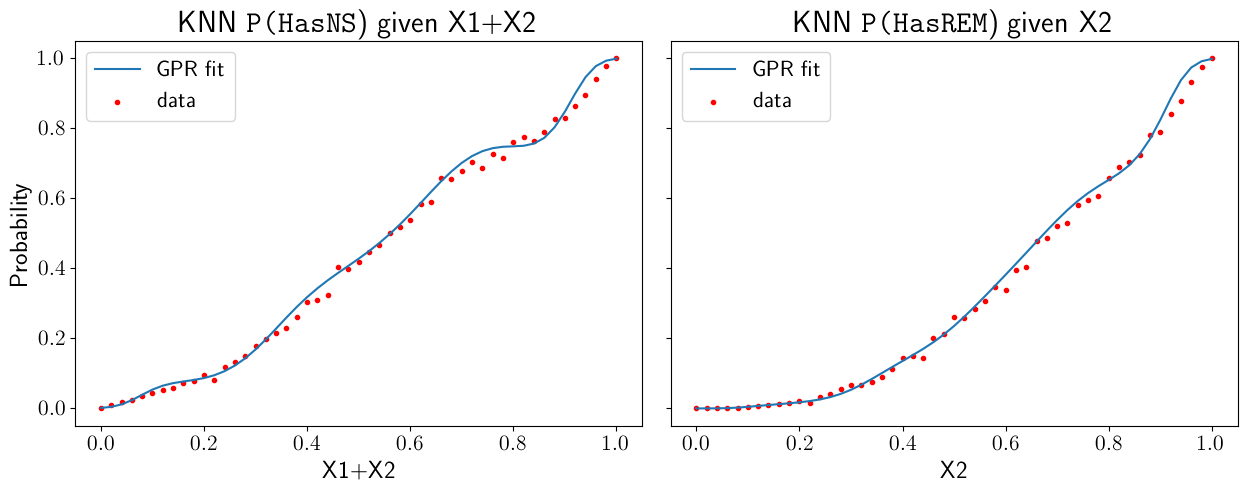

In [66]:
fig, ax = plt.subplots(1,2, sharey = 'all', figsize = (15,5))
fig.subplots_adjust(wspace=0.05)

for i in range(0,2):
    ax[i].tick_params(axis='x', labelsize=16)
    ax[i].tick_params(axis='y', labelsize=16)
       
ax[0].plot(xfit_ns,pfitns, label = 'GPR fit')
ax[0].scatter(xnum_ns,pnumns, marker = '.', color = 'red', label = 'data')
ax[1].plot(xfit_rem,pfitrem, label = 'GPR fit')
ax[1].scatter(xnum_rem,pnumrem, marker = '.', color = 'red', label = 'data')
ax[0].set_title(algorithm+r' \texttt{P(HasNS}) given X1+X2', fontsize = 22)
ax[1].set_title(algorithm+r' \texttt{P(HasREM}) given X2', fontsize = 22)
ax[0].set_ylabel('Probability', fontsize = 18)
ax[0].set_xlabel('X1+X2', fontsize = 18)
ax[1].set_xlabel('X2', fontsize = 18)
ax[0].legend(fontsize = 16)
ax[1].legend(fontsize = 16)

plt.savefig(algorithm+'_'+EOS+'_prob_plots.png',dpi=300, facecolor="w")